# 📈 Análisis Exploratorio de Datos (EDA) - Horizonte Europa PM9

Este notebook realiza un análisis exploratorio de los datos administrativos de proyectos del Programa Marco 9 (Horizonte Europa), enfocándose en análisis descriptivo y de distribuciones.

## Consideraciones:
- **Datos administrativos**: Se analizan principalmente distribuciones y frecuencias
- **Variables categóricas**: Énfasis en análisis de categorías y cruces
- **Variables numéricas**: Presupuestos, duraciones y participación

## Contenido:
1. Carga de datos preprocesados
2. Análisis temporal
3. (En construcción...)

In [40]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import wordcloud
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1. Carga de Datos Preprocesados

In [6]:
# Cargar datos limpios del preprocesado
# Especificar tipos de datos para evitar que los años se lean como numéricos
df = pd.read_excel(
    '../data/9PM_bootcamp_clean.xlsx',
    dtype={'Año Inicio': str, 'Año Fin': str, 'Centro': str, 'Ref.UE': str, 'Cód.área': str}
)

print(f"📁 Dataset cargado: {df.shape[0]} proyectos × {df.shape[1]} variables")
print(f"\n📋 Variables disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🔍 Primeras filas del dataset:")
display(df.head())

📁 Dataset cargado: 694 proyectos × 27 variables

📋 Variables disponibles:
   1. Ref.CSIC
   2. Ref.UE
   3. Situación
   4. Programa
   5. Acción clave
   6. Título
   7. Comienzo
   8. Final
   9. Duración (meses)
  10. Importe Concedido
  11. Participantes CSIC
  12. Participantes España (no CSIC)
  13. Total Participantes
  14. Cód.área
  15. Acrónimo del proyecto
  16. Convocatoria
  17. Centro
  18. Nombre Centro IP
  19. Resumen
  20. Keywords
  21. Nombre Centro IP Normalizado
  22. Area
  23. Año Inicio
  24. Año Fin
  25. Presupuesto Mensual
  26. Duración (categoría)
  27. Presupuesto (categoría)

🔍 Primeras filas del dataset:


,Ref.CSIC,Ref.UE,Situación,Programa,Acción clave,Título,Comienzo,Final,Duración (meses),Importe Concedido,...,Nombre Centro IP,Resumen,Keywords,Nombre Centro IP Normalizado,Area,Año Inicio,Año Fin,Presupuesto Mensual,Duración (categoría),Presupuesto (categoría)
0,EUROHPC/1238,101196247,VIGENTE,JOINT UNDERTAKING,JOINT UNDERTAKING,Europe-India Partnership for Scientific High-P...,2025-01-02,2028-01-31,36.0,302687.50,...,GEOCIENCIAS BARCELONA,HIGH-PERFORMANCE COMPUTING (HPC) IS A MAJOR EN...,NaN,GEOCIENCIAS BARCELONA,VIDA,2025,2028,8407.99,Medio,Mediano
1,HE/CBE/0653,101214822,VIGENTE,JOINT UNDERTAKING,JOINT UNDERTAKING,Bio-based in Soil applications with Optimal bi...,2025-01-09,2029-08-31,48.0,273837.50,...,INSTO. CATALISIS Y PETROLEOQUIMICA,THE USE OF PLASTIC PRODUCTS HAS INCREASED SIGN...,IMPROVED CONTROLLED BIODEGRADABILIY; IMPROVED ...,INSTO. CATALISIS Y PETROLEOQUIMICA,MATERIA,2025,2029,5704.95,Largo,Mediano
2,HE/CLEANH2/0431,101137792,VIGENTE,JTI-CLEANH2,JTI-CLEANH2,A novel multi-stage steam gasification and syn...,2024-01-01,2027-12-31,48.0,220047.50,...,INSTO. CARBOQUIMICA,EUROPE FACES THE JOINT CHALLENGE OF DECARBONIS...,NaN,INSTO. CARBOQUIMICA,MATERIA,2024,2027,4584.32,Largo,Mediano
3,HE/CLEANH2/0571,101137756,VIGENTE,JTI-CLEANH2,JTI-CLEANH2,Carbon-negative pressurized hydrogen productio...,2024-01-10,2028-09-30,48.0,224156.25,...,INSTO. TECNOLOGIA QUIMICA,CARMA-H2 WILL ENABLE HIGHLY ATTRACTIVE HYDROGE...,CARBON NEGATIVE ELECTROCHEMICAL HYDROGEN PRODU...,INSTO. TECNOLOGIA QUIMICA,MATERIA,2024,2028,4669.92,Largo,Mediano
4,HE/CLEANH2/0576,101192337,VIGENTE,JTI-CLEANH2,JTI-CLEANH2,DIAGNOSTIC TOOLS AND RISK PROTOCOLS TO ACCELER...,2025-01-01,2028-02-29,38.0,360375.00,...,INSTO. DIAGNOSTICO AMBIENTAL Y ESTUDIOS DEL AGUA,THE OVERALL GOAL OF THE HYDRA PROJECT IS THE ¿...,MICROBIAL RISK; UNDERGROUND HYDROGEN STORAGE; ...,INSTO. DIAGNOSTICO AMBIENTAL Y ESTUDIOS DEL AGUA,VIDA,2025,2028,9483.55,Largo,Mediano


## 2. Análisis Temporal

### 2.1 Distribución de Proyectos por Año de Inicio

📊 DISTRIBUCIÓN DE PROYECTOS POR AÑO DE INICIO

📈 Proyectos por año:
   2021: 14 proyectos
   2022: 127 proyectos
   2023: 163 proyectos
   2024: 208 proyectos
   2025: 135 proyectos
   2026: 16 proyectos


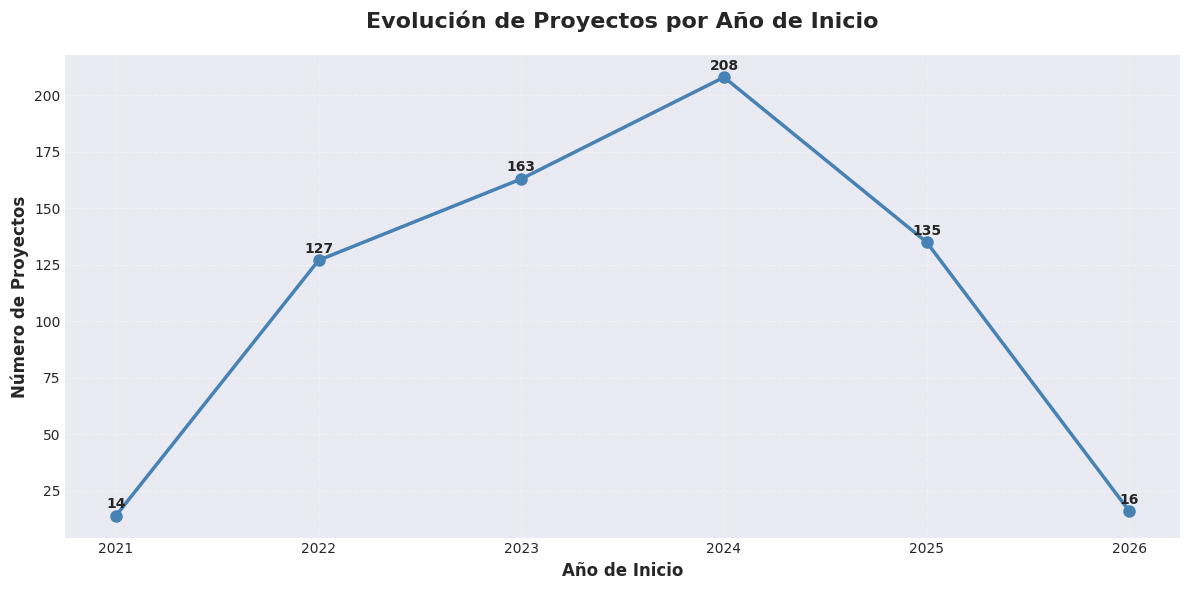


✅ Total de proyectos: 663
📅 Período: 2021 - 2026


In [9]:
# Histograma de proyectos por año de inicio
print("📊 DISTRIBUCIÓN DE PROYECTOS POR AÑO DE INICIO")
print("=" * 60)

# Contar proyectos por año (ya viene como string desde la carga)
proyectos_por_año = df['Año Inicio'].value_counts().sort_index()

print(f"\n📈 Proyectos por año:")
for año, count in proyectos_por_año.items():
    print(f"   {año}: {count} proyectos")

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de líneas
proyectos_por_año.plot(kind='line', color='steelblue', linewidth=2.5, marker='o', markersize=8, ax=ax)

ax.set_title('Evolución de Proyectos por Año de Inicio', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Año de Inicio', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Proyectos', fontsize=12, fontweight='bold')
ax.grid(axis='both', alpha=0.3, linestyle='--')

# Añadir valores sobre los puntos (usando índices numéricos)
for i, (año, count) in enumerate(proyectos_por_año.items()):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Total de proyectos: {proyectos_por_año.sum()}")
print(f"📅 Período: {proyectos_por_año.index.min()} - {proyectos_por_año.index.max()}")

### 2.2 Districión de Proyectos por Año de Inicio y Programa

📊 EVOLUCIÓN DE PROYECTOS POR AÑO Y PROGRAMA

📋 Programas encontrados: 8
   1. EIT: 13 proyectos
   2. JOINT UNDERTAKING: 9 proyectos
   3. JTI-CLEANH2: 3 proyectos
   4. Misiones: 7 proyectos
   5. Pilar II (Global challenges): 234 proyectos
   6. Pillar I (Excellent Science): 354 proyectos
   7. Pillar III (Innovative Europe): 53 proyectos
   8. Widening: 18 proyectos


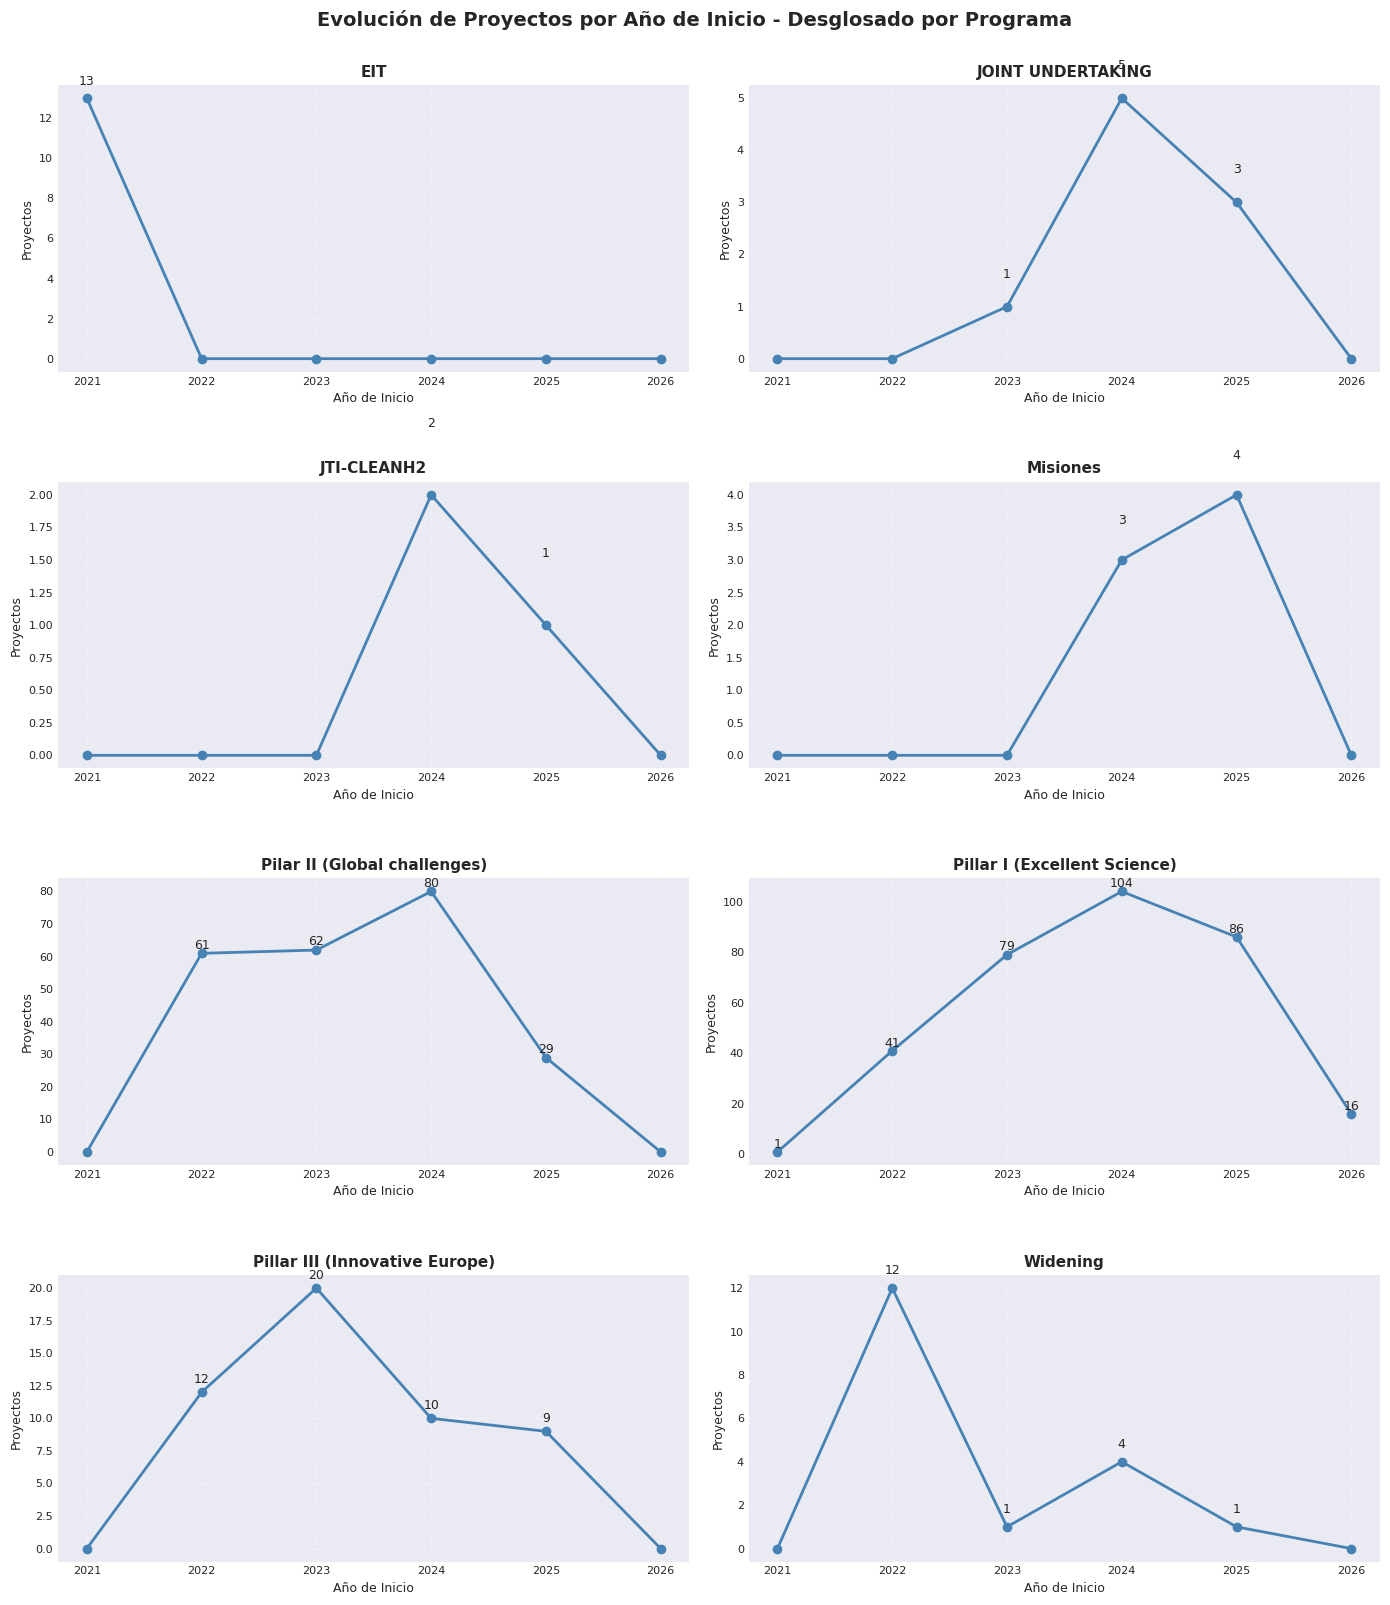


📈 TABLA DE PROYECTOS POR AÑO Y PROGRAMA:


Programa,EIT,JOINT UNDERTAKING,JTI-CLEANH2,Misiones,Pilar II (Global challenges),Pillar I (Excellent Science),Pillar III (Innovative Europe),Widening
Año Inicio,,,,,,,,
2021,13,0,0,0,0,1,0,0
2022,0,0,0,0,61,41,12,12
2023,0,1,0,0,62,79,20,1
2024,0,5,2,3,80,104,10,4
2025,0,3,1,4,29,86,9,1
2026,0,0,0,0,0,16,0,0



📊 Total por programa:
   EIT: 13 proyectos
   JOINT UNDERTAKING: 9 proyectos
   JTI-CLEANH2: 3 proyectos
   Misiones: 7 proyectos
   Pilar II (Global challenges): 232 proyectos
   Pillar I (Excellent Science): 327 proyectos
   Pillar III (Innovative Europe): 51 proyectos
   Widening: 18 proyectos


In [12]:
# Evolución de proyectos por año de inicio, separado por Programa
print("📊 EVOLUCIÓN DE PROYECTOS POR AÑO Y PROGRAMA")
print("=" * 60)

# Obtener lista de programas únicos (excluyendo nulos)
programas = df['Programa'].dropna().unique()
print(f"\n📋 Programas encontrados: {len(programas)}")
for i, programa in enumerate(sorted(programas), 1):
    count = len(df[df['Programa'] == programa])
    print(f"   {i}. {programa}: {count} proyectos")

# Crear una tabla cruzada de Año Inicio vs Programa (sin nulos)
df_sin_nulos = df.dropna(subset=['Programa'])
tabla_año_programa = pd.crosstab(df_sin_nulos['Año Inicio'], df_sin_nulos['Programa'])

# Calcular número de filas necesarias (2 columnas por fila)
programas_sorted = sorted(tabla_año_programa.columns)
n_programas = len(programas_sorted)
n_cols = 2
n_rows = (n_programas + n_cols - 1) // n_cols  # Redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
axes = axes.flatten() if n_programas > 1 else [axes]

# Graficar cada programa en su propio subplot
for idx, programa in enumerate(programas_sorted):
    ax = axes[idx]
    
    # Datos del programa
    datos_programa = tabla_año_programa[programa]
    
    # Gráfico de líneas
    datos_programa.plot(
        kind='line',
        ax=ax,
        color='steelblue',
        linewidth=2,
        marker='o',
        markersize=6
    )
    
    # Añadir valores sobre los puntos
    for i, (año, count) in enumerate(datos_programa.items()):
        if count > 0:  # Solo mostrar si hay proyectos
            ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)
    
    ax.set_title(f'{programa}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Año de Inicio', fontsize=9)
    ax.set_ylabel('Proyectos', fontsize=9)
    ax.grid(axis='both', alpha=0.3, linestyle='--')
    ax.tick_params(axis='both', labelsize=8)

# Ocultar subplots vacíos si hay número impar de programas
for idx in range(n_programas, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Evolución de Proyectos por Año de Inicio - Desglosado por Programa', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Mostrar tabla de datos
print(f"\n📈 TABLA DE PROYECTOS POR AÑO Y PROGRAMA:")
print("=" * 60)
display(tabla_año_programa)

print(f"\n📊 Total por programa:")
for programa in programas_sorted:
    total = tabla_año_programa[programa].sum()
    print(f"   {programa}: {total} proyectos")

### 2.3 Duración Promedio por Programa

📊 DURACIÓN PROMEDIO POR PROGRAMA

📈 Duración promedio (meses) por programa:
   Pilar II (Global challenges): 46.1 meses (233 proyectos)
   JTI-CLEANH2: 44.7 meses (3 proyectos)
   Widening: 41.4 meses (18 proyectos)
   Misiones: 41.0 meses (7 proyectos)
   Pillar III (Innovative Europe): 41.0 meses (52 proyectos)
   Pillar I (Excellent Science): 37.5 meses (351 proyectos)
   JOINT UNDERTAKING: 36.9 meses (9 proyectos)
   EIT: 34.9 meses (13 proyectos)


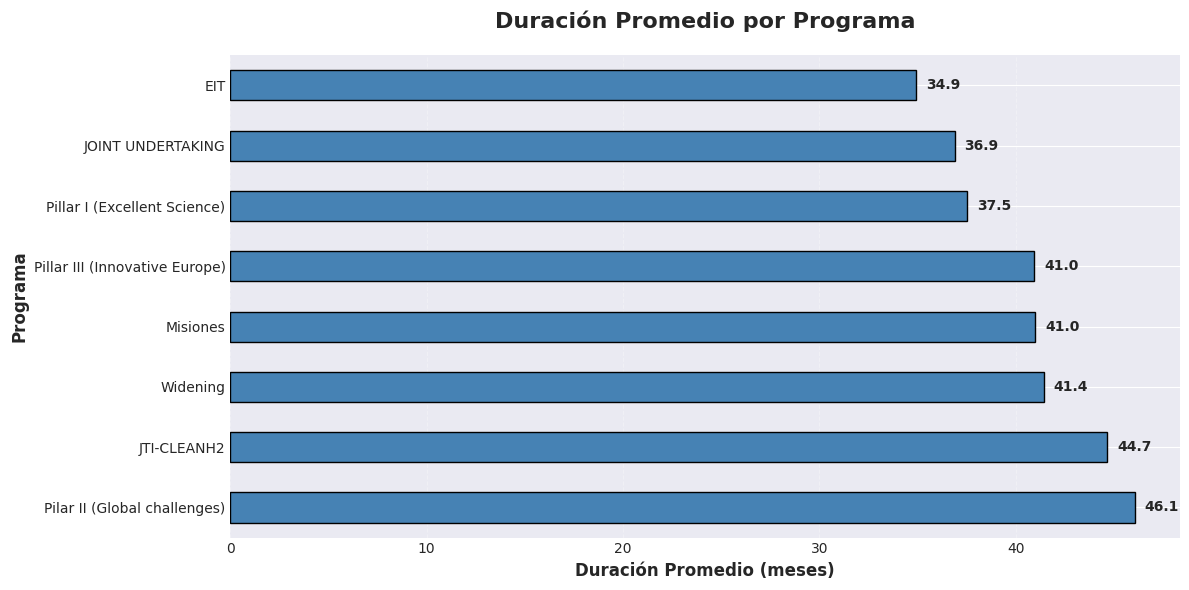

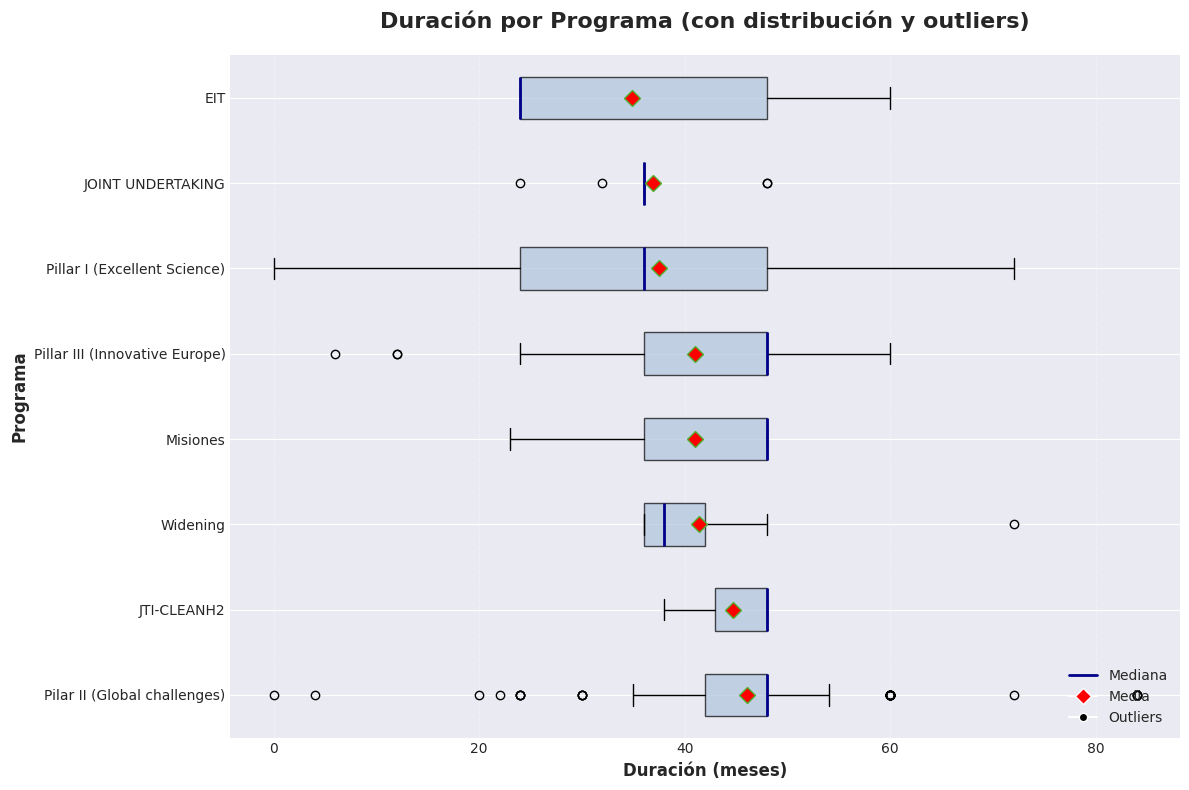


📊 ESTADÍSTICAS POR PROGRAMA:

Pilar II (Global challenges):
   Media: 46.1 meses
   Mediana: 48.0 meses
   Desv. Est.: 10.4 meses
   Rango: 0 - 84 meses

JTI-CLEANH2:
   Media: 44.7 meses
   Mediana: 48.0 meses
   Desv. Est.: 5.8 meses
   Rango: 38 - 48 meses

Widening:
   Media: 41.4 meses
   Mediana: 38.0 meses
   Desv. Est.: 8.9 meses
   Rango: 36 - 72 meses

Misiones:
   Media: 41.0 meses
   Mediana: 48.0 meses
   Desv. Est.: 9.7 meses
   Rango: 23 - 48 meses

Pillar III (Innovative Europe):
   Media: 41.0 meses
   Mediana: 48.0 meses
   Desv. Est.: 11.7 meses
   Rango: 6 - 60 meses

Pillar I (Excellent Science):
   Media: 37.5 meses
   Mediana: 36.0 meses
   Desv. Est.: 16.5 meses
   Rango: 0 - 72 meses

JOINT UNDERTAKING:
   Media: 36.9 meses
   Mediana: 36.0 meses
   Desv. Est.: 7.4 meses
   Rango: 24 - 48 meses

EIT:
   Media: 34.9 meses
   Mediana: 24.0 meses
   Desv. Est.: 14.0 meses
   Rango: 24 - 60 meses

✅ Duración promedio global: 40.8 meses


In [16]:
# Duración promedio en meses por programa
print("📊 DURACIÓN PROMEDIO POR PROGRAMA")
print("=" * 60)

# Calcular duración promedio por programa (excluyendo nulos)
df_con_duracion = df.dropna(subset=['Programa', 'Duración (meses)'])
duracion_por_programa = df_con_duracion.groupby('Programa')['Duración (meses)'].mean().sort_values(ascending=False)

print(f"\n📈 Duración promedio (meses) por programa:")
for programa, duracion in duracion_por_programa.items():
    count = len(df_con_duracion[df_con_duracion['Programa'] == programa])
    print(f"   {programa}: {duracion:.1f} meses ({count} proyectos)")

# GRÁFICO 1: Barras de duración promedio
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras horizontales (mejor para nombres largos)
duracion_por_programa.plot(
    kind='barh',
    ax=ax,
    color='steelblue',
    edgecolor='black'
)

ax.set_title('Duración Promedio por Programa', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duración Promedio (meses)', fontsize=12, fontweight='bold')
ax.set_ylabel('Programa', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores al final de cada barra
for i, (programa, duracion) in enumerate(duracion_por_programa.items()):
    ax.text(duracion + 0.5, i, f'{duracion:.1f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# GRÁFICO 2: Boxplot con distribución y outliers
fig, ax = plt.subplots(figsize=(12, 8))

# Preparar datos para boxplot (ordenados por promedio descendente)
programas_ordenados = duracion_por_programa.index.tolist()
datos_boxplot = [df_con_duracion[df_con_duracion['Programa'] == prog]['Duración (meses)'].values 
                 for prog in programas_ordenados]

# Crear boxplot horizontal
bp = ax.boxplot(datos_boxplot, 
                vert=False,  # Horizontal
                patch_artist=True,  # Para colorear las cajas
                labels=programas_ordenados,
                showmeans=True,  # Mostrar media
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8, label='Media'))

# Colorear las cajas
for patch in bp['boxes']:
    patch.set_facecolor('lightsteelblue')
    patch.set_alpha(0.7)

# Colorear las medianas
for median in bp['medians']:
    median.set_color('darkblue')
    median.set_linewidth(2)

ax.set_title('Duración por Programa (con distribución y outliers)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duración (meses)', fontsize=12, fontweight='bold')
ax.set_ylabel('Programa', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='darkblue', linewidth=2, label='Mediana'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='red', markersize=8, label='Media'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=6, label='Outliers')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📊 ESTADÍSTICAS POR PROGRAMA:")
print("=" * 60)
for programa in programas_ordenados:
    datos_prog = df_con_duracion[df_con_duracion['Programa'] == programa]['Duración (meses)']
    print(f"\n{programa}:")
    print(f"   Media: {datos_prog.mean():.1f} meses")
    print(f"   Mediana: {datos_prog.median():.1f} meses")
    print(f"   Desv. Est.: {datos_prog.std():.1f} meses")
    print(f"   Rango: {datos_prog.min():.0f} - {datos_prog.max():.0f} meses")

print(f"\n✅ Duración promedio global: {df_con_duracion['Duración (meses)'].mean():.1f} meses")

## 3. Análisis Presupuestario

### 3.1 Distribución del Presupuesto (Importe Concedido)

PRESUPUESTO TOTAL POR AÑO DE INICIO

Proyectos con importe válido: 685 de 694

📊 Presupuesto total por año de inicio:
   2021: 1,876,599.81 € (14 proyectos)
   2022: 62,722,281.30 € (127 proyectos)
   2023: 82,162,566.12 € (159 proyectos)
   2024: 99,629,267.36 € (207 proyectos)
   2025: 70,297,471.46 € (133 proyectos)
   2026: 12,717,670.62 € (16 proyectos)


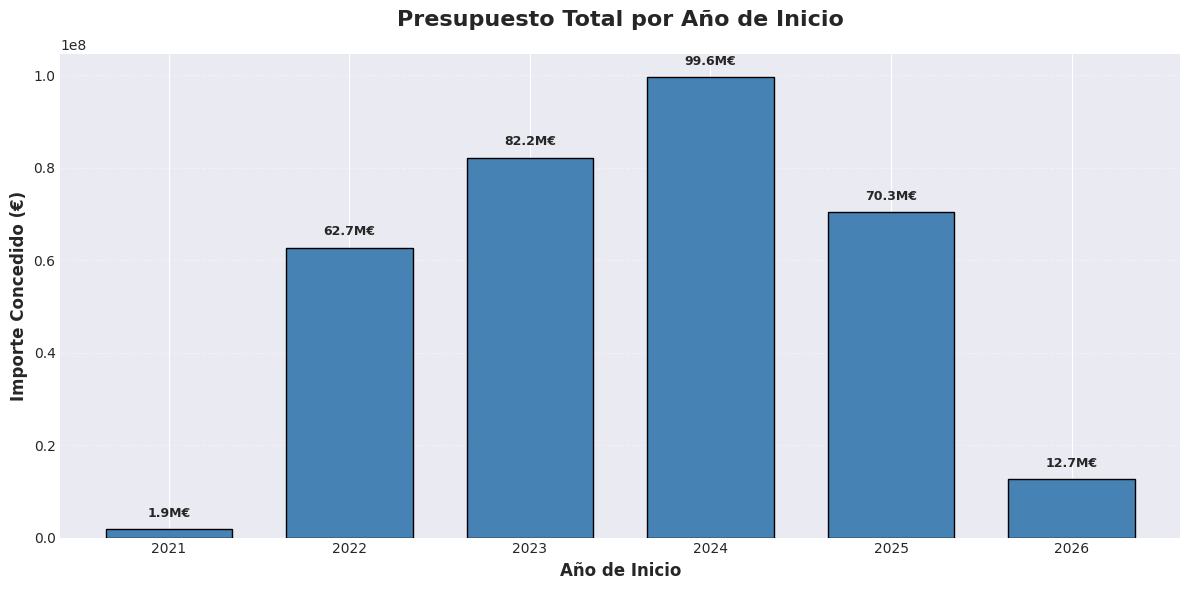


✅ Presupuesto total concedido: 329,405,856.67 €
📈 Presupuesto promedio por año: 54,900,976.11 €


In [18]:
# Presupuesto total por año de inicio
print("=" * 60)
print("PRESUPUESTO TOTAL POR AÑO DE INICIO")
print("=" * 60)

# Filtrar proyectos con importe válido
df_con_importe = df[df['Importe Concedido'].notna() & (df['Importe Concedido'] > 0)]

print(f"\nProyectos con importe válido: {len(df_con_importe)} de {len(df)}")

# Calcular presupuesto total por año de inicio
presupuesto_por_año = df_con_importe.groupby('Año Inicio')['Importe Concedido'].sum().sort_index()

print(f"\n📊 Presupuesto total por año de inicio:")
for año, presupuesto in presupuesto_por_año.items():
    count = len(df_con_importe[df_con_importe['Año Inicio'] == año])
    print(f"   {año}: {presupuesto:,.2f} € ({count} proyectos)")

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras
presupuesto_por_año.plot(kind='bar', color='steelblue', edgecolor='black', ax=ax, width=0.7)

ax.set_title('Presupuesto Total por Año de Inicio', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Año de Inicio', fontsize=12, fontweight='bold')
ax.set_ylabel('Importe Concedido (€)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.tick_params(axis='x', rotation=0)

# Añadir valores sobre las barras (en millones de euros para mejor legibilidad)
for i, (año, presupuesto) in enumerate(presupuesto_por_año.items()):
    ax.text(i, presupuesto + presupuesto_por_año.max() * 0.02, 
            f'{presupuesto/1e6:.1f}M€', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Presupuesto total concedido: {presupuesto_por_año.sum():,.2f} €")
print(f"📈 Presupuesto promedio por año: {presupuesto_por_año.mean():,.2f} €")

### 3.2 Presupuesto por Programa

PRESUPUESTO POR PROGRAMA

Proyectos válidos: 682 de 694

📊 Presupuesto total por programa:
   Pillar I (Excellent Science): 188,303,015.65 € (56.1%) - 351 proyectos
   Pilar II (Global challenges): 107,366,730.49 € (32.0%) - 229 proyectos
   Pillar III (Innovative Europe): 27,417,990.60 € (8.2%) - 52 proyectos
   Widening: 4,714,585.24 € (1.4%) - 18 proyectos
   JOINT UNDERTAKING: 2,705,770.00 € (0.8%) - 9 proyectos
   Misiones: 2,442,096.24 € (0.7%) - 7 proyectos
   EIT: 1,822,291.46 € (0.5%) - 13 proyectos
   JTI-CLEANH2: 804,578.75 € (0.2%) - 3 proyectos


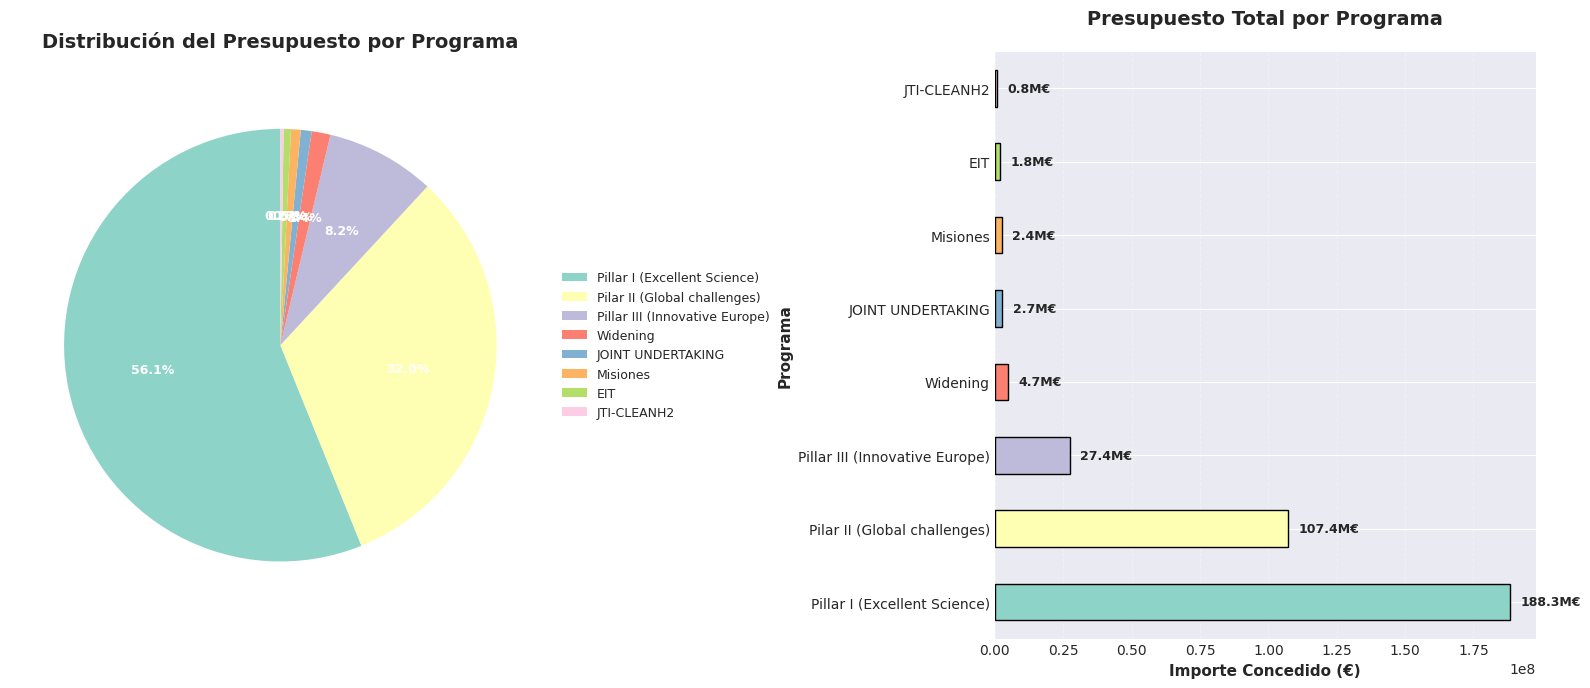


✅ Presupuesto total: 335,577,058.43 €
📈 Presupuesto promedio por programa: 41,947,132.30 €
📊 Programa con mayor presupuesto: Pillar I (Excellent Science) (188,303,015.65 €)
📊 Programa con menor presupuesto: JTI-CLEANH2 (804,578.75 €)


In [20]:
# Presupuesto total por Programa (gráfico de sectores)
print("=" * 60)
print("PRESUPUESTO POR PROGRAMA")
print("=" * 60)

# Filtrar proyectos con importe y programa válidos
df_programa_importe = df[(df['Importe Concedido'].notna()) & 
                         (df['Importe Concedido'] > 0) & 
                         (df['Programa'].notna())]

# Calcular presupuesto total por programa
presupuesto_por_programa = df_programa_importe.groupby('Programa')['Importe Concedido'].sum().sort_values(ascending=False)

print(f"\nProyectos válidos: {len(df_programa_importe)} de {len(df)}")
print(f"\n📊 Presupuesto total por programa:")
for programa, presupuesto in presupuesto_por_programa.items():
    count = len(df_programa_importe[df_programa_importe['Programa'] == programa])
    porcentaje = (presupuesto / presupuesto_por_programa.sum()) * 100
    print(f"   {programa}: {presupuesto:,.2f} € ({porcentaje:.1f}%) - {count} proyectos")

# Visualización: Gráfico de sectores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Gráfico de sectores (pie chart)
colores = plt.cm.Set3(range(len(presupuesto_por_programa)))

# Crear etiquetas solo para los 3 pilares
pilares = ['Pilar I', 'Pilar II', 'Pilar III']
labels_pie = [programa if programa in pilares else '' for programa in presupuesto_por_programa.index]

wedges, texts, autotexts = ax1.pie(
    presupuesto_por_programa.values,
    labels=labels_pie,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Mejorar legibilidad de los porcentajes
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)

ax1.set_title('Distribución del Presupuesto por Programa', fontsize=14, fontweight='bold', pad=20)

# Añadir leyenda completa fuera del gráfico para mostrar todas las categorías
ax1.legend(presupuesto_por_programa.index, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)

# Gráfico 2: Gráfico de barras horizontales para comparar montos
presupuesto_por_programa.plot(
    kind='barh',
    ax=ax2,
    color=colores,
    edgecolor='black'
)

ax2.set_title('Presupuesto Total por Programa', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Importe Concedido (€)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Programa', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores en millones de euros
for i, (programa, presupuesto) in enumerate(presupuesto_por_programa.items()):
    ax2.text(presupuesto + presupuesto_por_programa.max() * 0.02,
             i,
             f'{presupuesto/1e6:.1f}M€',
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Presupuesto total: {presupuesto_por_programa.sum():,.2f} €")
print(f"📈 Presupuesto promedio por programa: {presupuesto_por_programa.mean():,.2f} €")
print(f"📊 Programa con mayor presupuesto: {presupuesto_por_programa.idxmax()} ({presupuesto_por_programa.max():,.2f} €)")
print(f"📊 Programa con menor presupuesto: {presupuesto_por_programa.idxmin()} ({presupuesto_por_programa.min():,.2f} €)")

### 3.3 Presupuesto por Acción Clave (Pilar I)

PRESUPUESTO POR ACCIÓN CLAVE - PILAR I (EXCELLENT SCIENCE)

Proyectos del Pilar I (Excellent Science): 354 de 694 totales
Proyectos del Pilar I con importe válido: 351

📊 Presupuesto total por Acción Clave (Pilar I - Excellent Science):
   ERC: 121,851,157.33 € (64.7%) - 91 proyectos
   MSCA: 53,647,863.26 € (28.5%) - 214 proyectos
   INFRAESTRUCTURES: 12,803,995.06 € (6.8%) - 46 proyectos


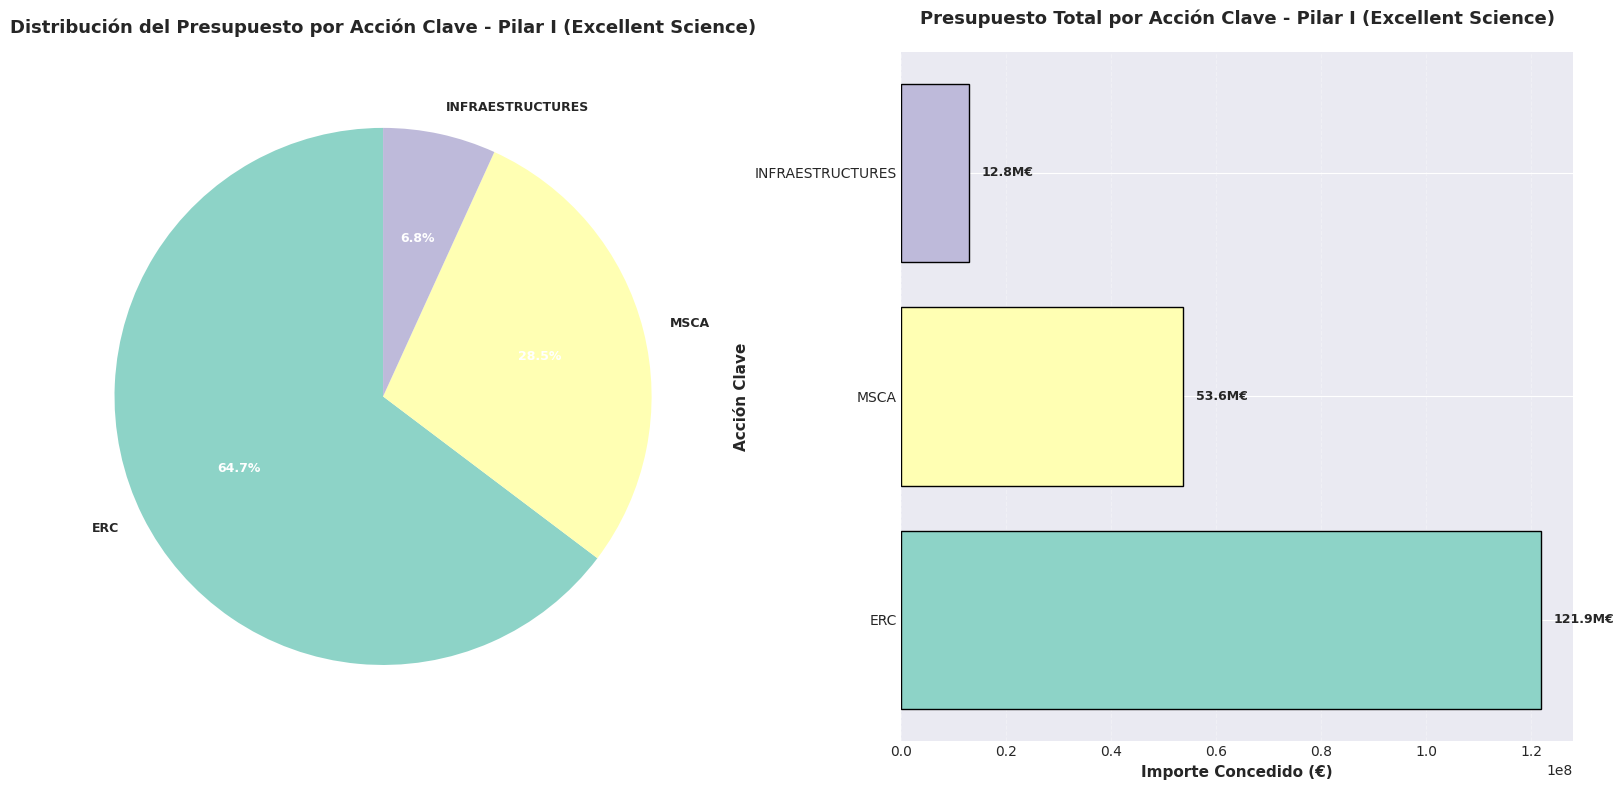


✅ Presupuesto total (Pilar I): 188,303,015.65 €
📊 Acción Clave con mayor presupuesto: ERC (121,851,157.33 €)
📊 Acción Clave con menor presupuesto: INFRAESTRUCTURES (12,803,995.06 €)


In [34]:
# Presupuesto por Acción Clave - PILAR I (EXCELLENT SCIENCE)
print("=" * 60)
print("PRESUPUESTO POR ACCIÓN CLAVE - PILAR I (EXCELLENT SCIENCE)")
print("=" * 60)

# Filtrar proyectos del Pilar I (Excellent Science) exactamente
df_pilar1 = df[df['Programa'] == 'Pillar I (Excellent Science)'].copy()

print(f"\nProyectos del Pilar I (Excellent Science): {len(df_pilar1)} de {len(df)} totales")

# Filtrar proyectos con importe válido
df_pilar1_importe = df_pilar1[(df_pilar1['Importe Concedido'].notna()) & (df_pilar1['Importe Concedido'] > 0)]

print(f"Proyectos del Pilar I con importe válido: {len(df_pilar1_importe)}")

# Calcular presupuesto total por Acción Clave
presupuesto_por_accion = df_pilar1_importe.groupby('Acción clave')['Importe Concedido'].sum().sort_values(ascending=False)

print(f"\n📊 Presupuesto total por Acción Clave (Pilar I - Excellent Science):")
for accion, presupuesto in presupuesto_por_accion.items():
    count = len(df_pilar1_importe[df_pilar1_importe['Acción clave'] == accion])
    porcentaje = (presupuesto / presupuesto_por_accion.sum()) * 100
    print(f"   {accion}: {presupuesto:,.2f} € ({porcentaje:.1f}%) - {count} proyectos")

# Verificar que hay datos antes de graficar
if len(presupuesto_por_accion) > 0:
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Gráfico 1: Gráfico de sectores
    colores = plt.cm.Set3(range(len(presupuesto_por_accion)))
    wedges, texts, autotexts = ax1.pie(
        presupuesto_por_accion.values,
        labels=presupuesto_por_accion.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        textprops={'fontsize': 9, 'weight': 'bold'}
    )

    # Mejorar legibilidad de los porcentajes
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(9)

    ax1.set_title('Distribución del Presupuesto por Acción Clave - Pilar I (Excellent Science)', fontsize=13, fontweight='bold', pad=20)

    # Gráfico 2: Gráfico de barras horizontales
    ax2.barh(range(len(presupuesto_por_accion)), 
             presupuesto_por_accion.values,
             color=colores,
             edgecolor='black')
    ax2.set_yticks(range(len(presupuesto_por_accion)))
    ax2.set_yticklabels(presupuesto_por_accion.index)

    ax2.set_title('Presupuesto Total por Acción Clave - Pilar I (Excellent Science)', fontsize=13, fontweight='bold', pad=20)
    ax2.set_xlabel('Importe Concedido (€)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Acción Clave', fontsize=11, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3, linestyle='--')

    # Añadir valores en millones de euros
    for i, (accion, presupuesto) in enumerate(presupuesto_por_accion.items()):
        ax2.text(presupuesto + presupuesto_por_accion.max() * 0.02,
                 i,
                 f'{presupuesto/1e6:.1f}M€',
                 va='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\n✅ Presupuesto total (Pilar I): {presupuesto_por_accion.sum():,.2f} €")
    print(f"📊 Acción Clave con mayor presupuesto: {presupuesto_por_accion.idxmax()} ({presupuesto_por_accion.max():,.2f} €)")
    print(f"📊 Acción Clave con menor presupuesto: {presupuesto_por_accion.idxmin()} ({presupuesto_por_accion.min():,.2f} €)")
else:
    print("\n⚠️ No hay proyectos del Pilar I con Acción Clave e importe definidos")

## 4. Análisis por Áreas Científicas

### 4.1 Distribución de Proyectos por Área Científica

DISTRIBUCIÓN DE PROYECTOS POR ÁREA CIENTÍFICA

Total de proyectos: 694

📊 Proyectos por área científica:
   VIDA: 314 proyectos (45.2%)
   MATERIA: 244 proyectos (35.2%)
   DESCONOCIDO: 98 proyectos (14.1%)
   SOCIEDAD: 36 proyectos (5.2%)
   CENTRAL: 2 proyectos (0.3%)


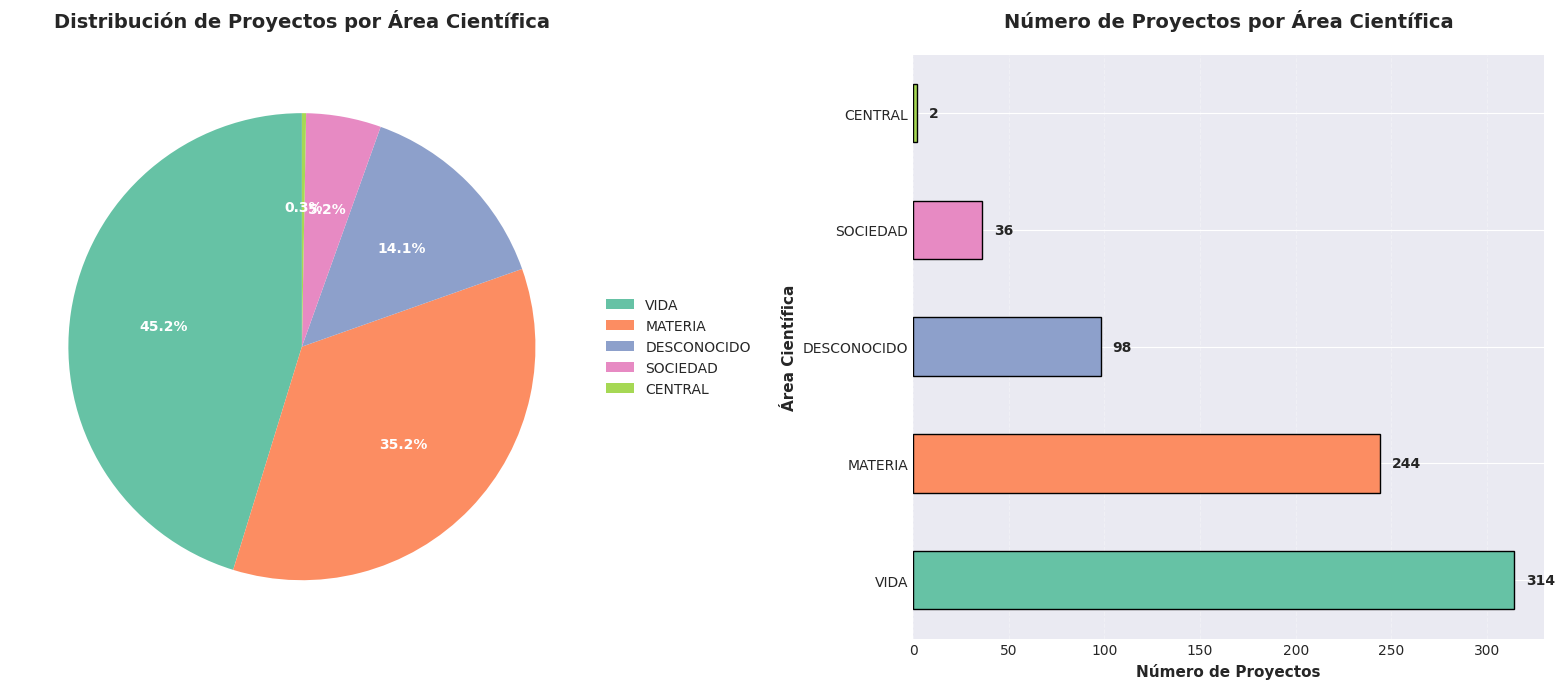


✅ Total de proyectos analizados: 694
📊 Área con más proyectos: VIDA (314 proyectos)
📊 Área con menos proyectos: CENTRAL (2 proyectos)


In [38]:
# Distribución de proyectos por área científica
print("=" * 60)
print("DISTRIBUCIÓN DE PROYECTOS POR ÁREA CIENTÍFICA")
print("=" * 60)

# Contar proyectos por área científica
proyectos_por_area = df['Area'].value_counts()

print(f"\nTotal de proyectos: {len(df)}")
print(f"\n📊 Proyectos por área científica:")
for area, count in proyectos_por_area.items():
    porcentaje = (count / proyectos_por_area.sum()) * 100
    print(f"   {area}: {count} proyectos ({porcentaje:.1f}%)")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Gráfico de sectores
colores = plt.cm.Set2(range(len(proyectos_por_area)))
wedges, texts, autotexts = ax1.pie(
    proyectos_por_area.values,
    labels=None,  # Sin etiquetas para evitar solapamientos
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Mejorar legibilidad de los porcentajes
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax1.set_title('Distribución de Proyectos por Área Científica', fontsize=14, fontweight='bold', pad=20)

# Añadir leyenda fuera del gráfico
ax1.legend(proyectos_por_area.index, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

# Gráfico 2: Gráfico de barras horizontales
proyectos_por_area.plot(
    kind='barh',
    ax=ax2,
    color=colores,
    edgecolor='black'
)

ax2.set_title('Número de Proyectos por Área Científica', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Número de Proyectos', fontsize=11, fontweight='bold')
ax2.set_ylabel('Área Científica', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores al final de las barras
for i, (area, count) in enumerate(proyectos_por_area.items()):
    ax2.text(count + proyectos_por_area.max() * 0.02,
             i,
             str(count),
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Total de proyectos analizados: {proyectos_por_area.sum()}")
print(f"📊 Área con más proyectos: {proyectos_por_area.idxmax()} ({proyectos_por_area.max()} proyectos)")
print(f"📊 Área con menos proyectos: {proyectos_por_area.idxmin()} ({proyectos_por_area.min()} proyectos)")